## Observations and Insights

The sex and age of a mouse don't appear to have any direct impact on the effectiveness of a given drug regimen. The data was a fairly even split with just a slight difference of .6% among sex, but that small difference and the range of mice age didn't seem to impact effectiveness.

The two most promising drug regimens, Capomulin and Ramicane, also happen to have the 2 largest counts of data points. These large sets could have skewed their perceived effectiveness.

There's a relatively strong correlation between mouse weight and average tumor volume at a score of .53, showing that as a mouse's tumor grows, as does the total weight of the mouse. However, there are other variables worth considering when examining this correlation, such as how the mouse's age may be impacting the weight as well.

## Dependencies and starter code

In [1]:
%matplotlib notebook

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, how='left', on=['Mouse ID'])
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [34]:
merge_df = merge_df.dropna()
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = merge_df.groupby(['Drug Regimen'])
drugs_mean = drug_group.mean()['Tumor Volume (mm3)']

stats_sum = pd.DataFrame(data=drugs_mean)
stats_sum.columns=['Tumor Volume Mean']
stats_sum

,Tumor Volume Mean
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.233149


In [5]:
for index, row in stats_sum.iterrows():
    stats_sum['Tumor Volume Median'] = drug_group.median()['Tumor Volume (mm3)']
    stats_sum['Tumor Volume Variance'] = drug_group['Tumor Volume (mm3)'].var()
    stats_sum['Standard Deviation'] = drug_group['Tumor Volume (mm3)'].std()
    stats_sum['SEM'] = drug_group['Tumor Volume (mm3)'].sem()

stats_sum

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
datapts = merge_df['Drug Regimen'].value_counts()
datapts_df = pd.DataFrame(datapts)
datapts_df.columns=['Count of Points']
datapts_df.index.names = ['Drug Regimen']

<IPython.core.display.Javascript object>


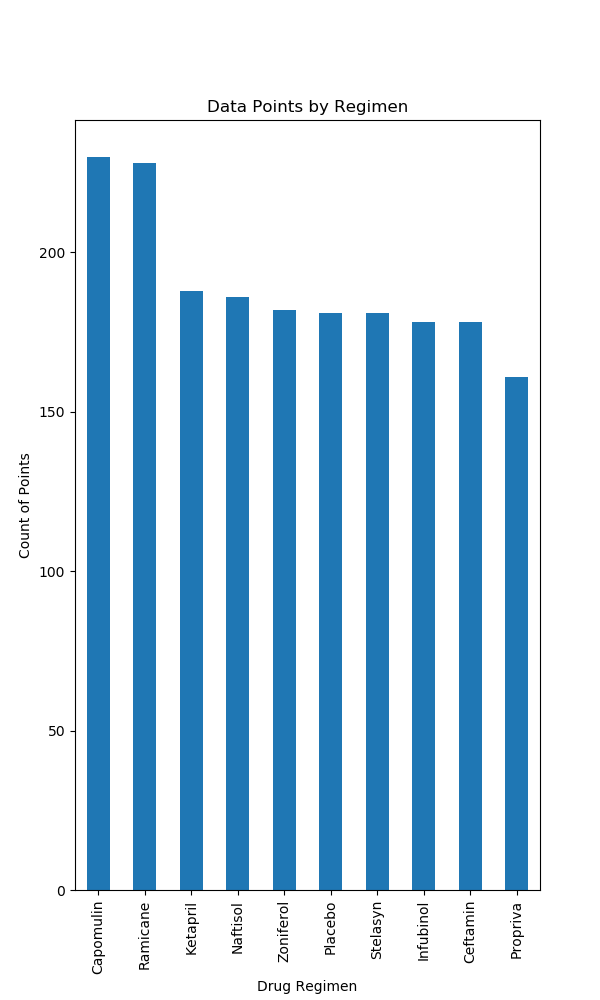

Text(0, 0.5, 'Count of Points')

In [7]:
datapts_df.plot(kind='bar', figsize=(6,10), legend=False)
plt.title('Data Points by Regimen')
plt.ylabel('Count of Points')

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(datapts_df))
tick_locations = [value for value in x_axis]

<IPython.core.display.Javascript object>


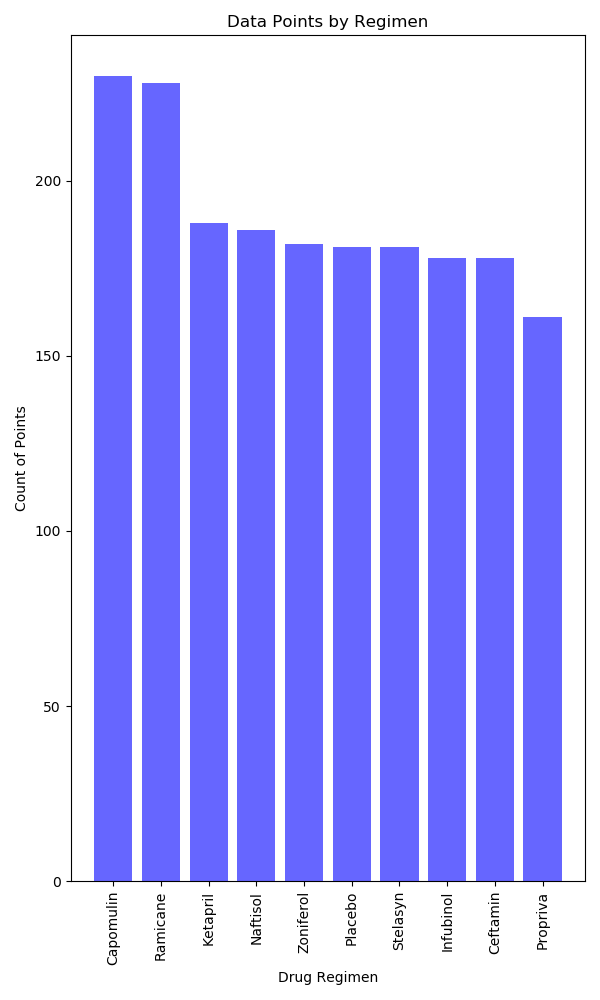

In [9]:
plt.figure(figsize=(6, 10))
plt.bar(x_axis, datapts_df['Count of Points'], color='b', alpha=0.6)
plt.xticks(tick_locations, datapts_df.index.values, rotation='vertical')
plt.title('Data Points by Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Count of Points')
plt.tight_layout()

## Pie plots

<IPython.core.display.Javascript object>


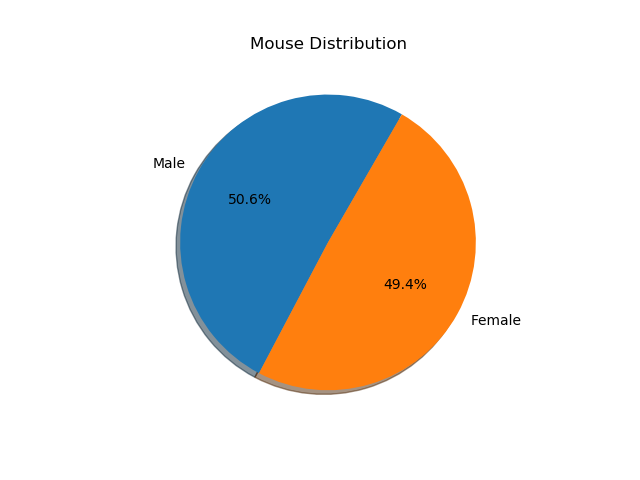

Text(0, 0.5, '')

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_count = merge_df['Sex'].value_counts()
mice_count_df = pd.DataFrame(mice_count)
mice_count_df.columns=['Count']
mice_count_df.index.names = ['Sex']

mice_count_df.plot.pie(y='Count', legend=False, autopct="%1.1f%%",startangle=60,shadow=True)
plt.title('Mouse Distribution')
plt.ylabel('')

<IPython.core.display.Javascript object>


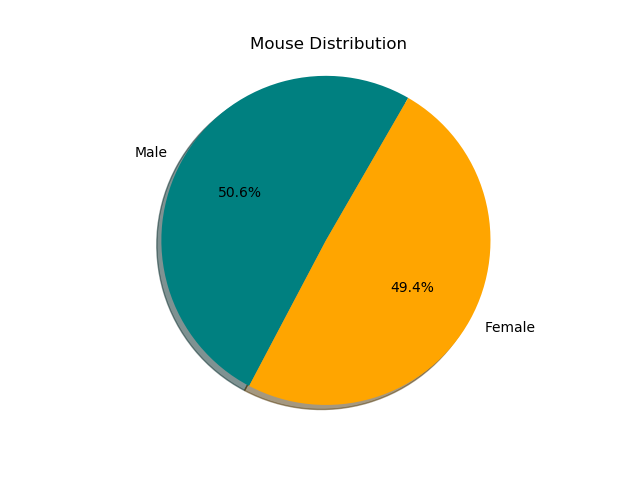

C:\Users\Cade\Anaconda\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


(-1.1105810168389945,
 1.1356882769356003,
 -1.1351892454007113,
 1.1108711653747656)

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['Teal','Orange']
plt.title('Mouse Distribution')
plt.pie(mice_count_df, labels=mice_count_df.index.values, colors=colors, autopct="%1.1f%%",shadow=True,startangle=60)
plt.axis('equal')

## Quartiles, outliers and boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
stats_sum.nsmallest(4, 'SEM')

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236


In [13]:
most_promising = merge_df.loc[merge_df['Drug Regimen'].isin(['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'])]
mp_grp = most_promising.groupby(['Mouse ID'])
final_vol = mp_grp.last()
final_vol

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a275,45,62.999356,3,Ceftamin,Female,20,28
a411,45,38.407618,1,Ramicane,Male,3,22
a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...
y769,45,68.594745,4,Ceftamin,Female,6,27
y793,45,31.896238,2,Capomulin,Male,17,17
y865,45,64.729837,3,Ceftamin,Male,23,26


In [14]:
quartiles = final_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'The IQR is {iqr}, and values below {lower_bound} or above {upper_bound} could be outliers.')

The IQR is 22.74251795250001, and values below 3.0739668737499812 or above 94.04403868375002 could be outliers.


In [15]:
final_volram = final_vol.loc[final_vol['Drug Regimen'].isin(['Ramicane'])]
final_volcap = final_vol.loc[final_vol['Drug Regimen'].isin(['Capomulin'])]
final_volinf = final_vol.loc[final_vol['Drug Regimen'].isin(['Infubinol'])]
final_volcef = final_vol.loc[final_vol['Drug Regimen'].isin(['Ceftamin'])]

<IPython.core.display.Javascript object>


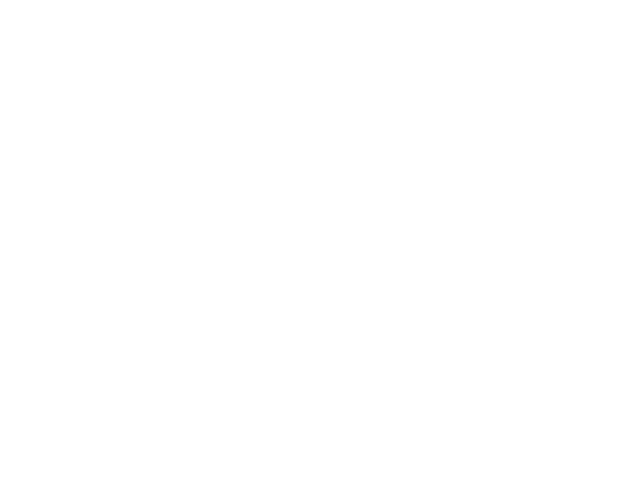

ValueError: cannot copy sequence with size 25 to array axis with dimension 7

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
vol_data = [final_volram, final_volcap, final_volinf, final_volcef]

fig, ax = plt.subplots()
pos = np.array(range(len(vol_data))) + 1
bp = ax.boxplot(vol_data, sym='k+', positions=pos,
                notch=1, bootstrap=5000)

# fig2, ax2 = plt.subplots()
# ax2.set_title('Capomulin: Final Volume')
# ax2.boxplot(final_volcap['Tumor Volume (mm3)'])

## Line and scatter plots

<IPython.core.display.Javascript object>


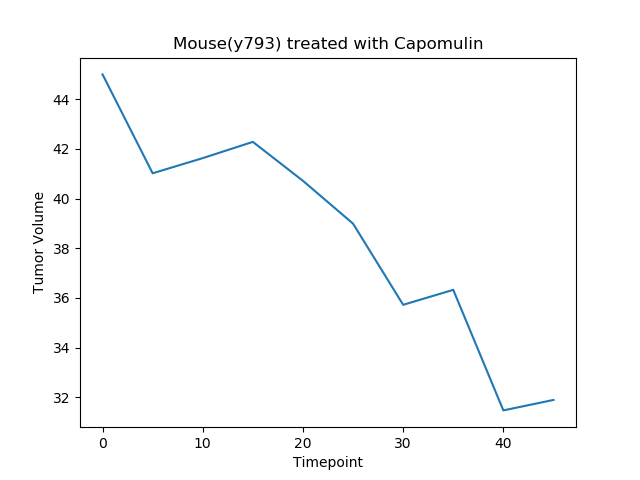

Text(0.5, 1.0, 'Mouse(y793) treated with Capomulin')

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mouse = merge_df.loc[merge_df['Mouse ID'].isin(['y793'])]
x_axis = cap_mouse['Timepoint']
y_axis = cap_mouse['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Mouse(y793) treated with Capomulin')

<IPython.core.display.Javascript object>


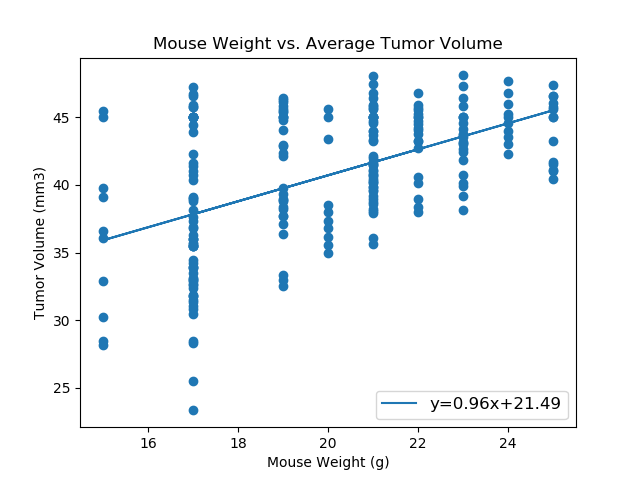

Text(0.5, 1.0, 'Mouse Weight vs. Average Tumor Volume')

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mice = merge_df.loc[merge_df['Drug Regimen'].isin(['Capomulin'])]
mouse_weight = cap_mice['Weight (g)']
mouse_vol = cap_mice['Tumor Volume (mm3)']
plt.scatter(mouse_weight, mouse_vol)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume')

In [29]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average 
# tumor volume for the Capomulin regimen
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(mouse_weight, mouse_vol)
vc_fit = vc_slope * mouse_weight + vc_int
plt.plot(mouse_weight, vc_fit, '-', label='y={:.2f}x+{:.2f}'.format(vc_slope,vc_int))
plt.legend(fontsize=12)

print(f'The correlation coefficient is {round(st.pearsonr(mouse_weight, mouse_vol)[0],2)}')

The correlation coefficient is 0.53
